In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from distgen.physical_constants import unit_registry
import numpy as np

# Uniform 1D 

The uniform distirbuition is defined by a probability distribution function:

$\rho(x) = \frac{1}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.  

The corresponding CDF is

$P(x) = \frac{x-a}{b-a}$ for $a\leq x\leq b$ and zero elsewhere.

The first and second moments of this distribution are:

$\langle x \rangle = \frac{1}{2}(a+b)$ and $\sigma_x = \frac{b-a}{\sqrt{12}}$

uniform
      min_x = 2.000 mm, max_x = 4.000 mm


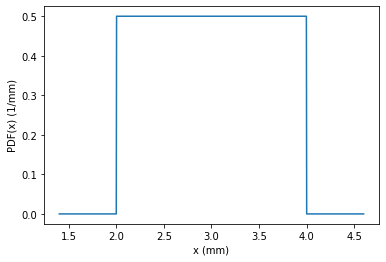

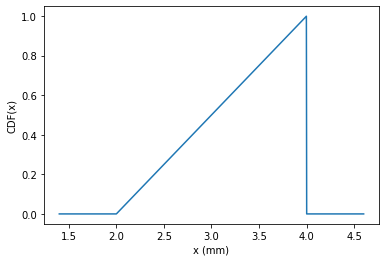

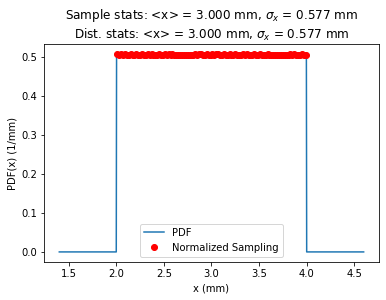

In [55]:
from distgen.dist import Uniform
var = 'x'
verbose=1
params={'min_x':2*unit_registry('mm'),'max_x':4*unit_registry('mm')}
uniform = Uniform(var,verbose=verbose,**params)
uniform.plot_pdf()
uniform.plot_cdf()
uniform.test_sampling()

# Normal Distribution (including truncation)

The general form of a normal distribution PDF with truncation is given by

$\rho(x) = \frac{1}{\sigma}\frac{\phi\left(\frac{x-\mu}{\sigma}\right)}{\Phi\left(\frac{b-\mu}{\sigma}\right)-\Phi\left(\frac{a-\mu}{\sigma}\right)}$.

In this expression $\phi(\xi) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}\xi^2}$ is the canonical normal distribution, $\Phi(\xi) = \frac{1}{2}\left[1 + erf\left(\frac{\xi}{\sqrt{2}}\right) \right]$ is the canonical normal CDF, and $a=-N_{cutoff}\cdot\sigma$ and $b=-N_{cutoff}\cdot\sigma$ are the left and right truncation points.  The CDF if given by

$P(x) = \frac{\Phi\left(\frac{x-\mu}{\sigma}\right) - \Phi\left(\frac{a-\mu}{\sigma}\right)}{\Phi\left(\frac{b-\mu}{\sigma}\right)-\Phi\left(\frac{a-\mu}{\sigma}\right)}$.

Defining $\alpha = \frac{a-\mu}{\sigma}$ and $\beta = \frac{b-\mu}{\sigma}$, the first and second moments of the distribution are:

$\langle x\rangle = \mu + \frac{\phi\left(\alpha\right) - \phi\left(\beta\right)}{\Phi\left(\beta\right)-\Phi\left(\alpha\right)}\sigma$ and $\sigma_x = \sigma \left\{1 + \frac{\alpha\phi\left(\alpha\right) - \beta\phi(\beta) }{\Phi(\beta) - \Phi(\alpha)} + \left(\frac{\phi\left(\alpha\right) - \phi(\beta)}{\Phi(\beta) - \Phi(\alpha)}\right)^{2} \right\}^{1/2} $.

When using this distribution, if the $N_{cutoff}$ is not set then the distribution reduces to an infinite range normal distribution, as first shown below:

Gaussian
      avg_x = -1.000 mm, sigma_x = 2.000 mm


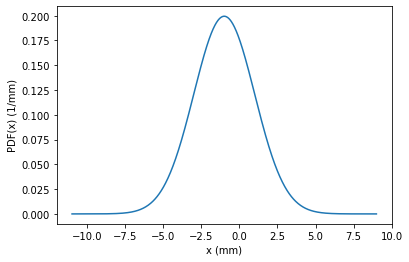

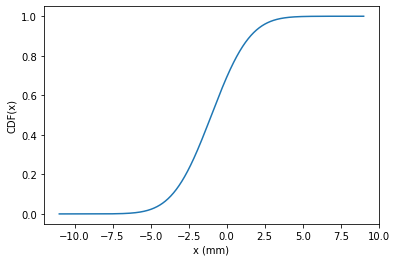

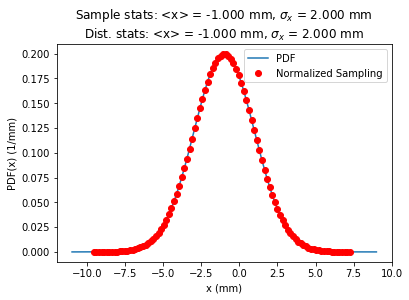

In [56]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':-1*unit_registry('mm')}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

Below the $N_{cutoff}$ parameter is set to cut the distribution symmetrically:

dict_keys(['sigma_x', 'avg_x', 'n_sigma_cutoff'])
-4 millimeter 4 millimeter
Gaussian
      avg_x = 0.000 mm, sigma_x = 2.000 mm
      Left n_sigma_cutoff = 2.000, Right n_sigma_cutoff = -2.000


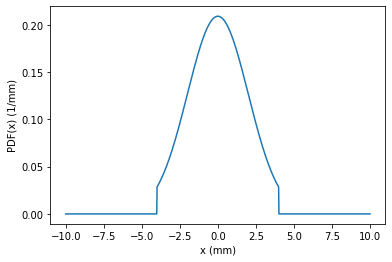

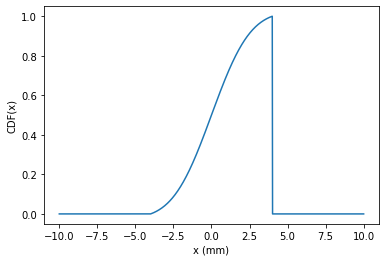

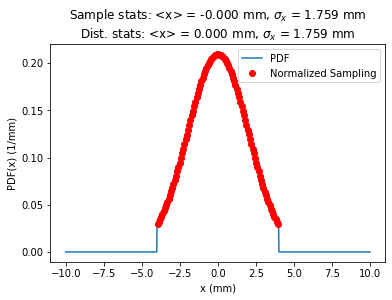

In [3]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':0*unit_registry('mm'), 'n_sigma_cutoff':2}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

The distribution can be truncated asymmetrically using the $N_{cutoff,R}$ and $N_{cutoff,L}$ parameters, as shown below.  Note in this case, it is only required that $N_{cutoff,L} < N_{cutoff,R}$, allowing for completley arbtitray location of the truncation points.  This requires a minus sign for the cut off parameters for truncation values less than zero.

woot
Gaussian
      avg_x = 0.000 mm, sigma_x = 2.000 mm
      Left n_sigma_cutoff = 1.000, Right n_sigma_cutoff = -1.500


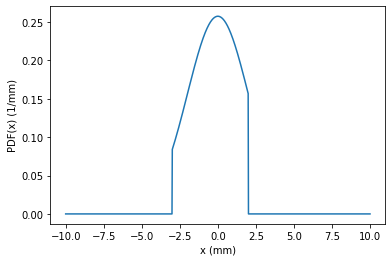

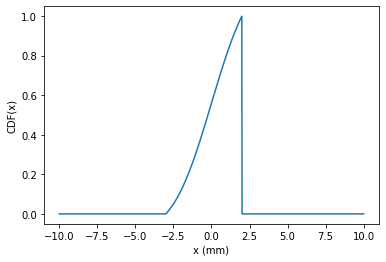

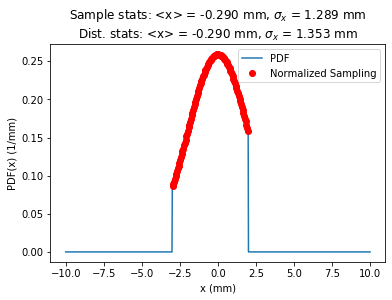

In [6]:
from distgen.dist import Norm
var = 'x'
verbose=1
params={'sigma_x':2*unit_registry('mm'),'avg_x':0*unit_registry('mm'), 
        'n_sigma_cutoff_left':-1.5,'n_sigma_cutoff_right':1}
norm = Norm(var,verbose=verbose,**params)
norm.plot_pdf()
norm.plot_cdf()
norm.test_sampling()

# 1D PDF from a file

Disgten supports importing a 1D PDF saved in column form in.  The input form of the file should have space separated headers such as $x$ and $Px$, with corresponding column data below it.  The PDF is normalized numerically using the numpy.trapz numerical integration routine. The CDF is computed using the scipy.cumtrapz cumulative numerical intgration routine.

The following example shows a gaussian PDF with cuts added to it.

t-distribution file: 'cutgauss.1d.txt'


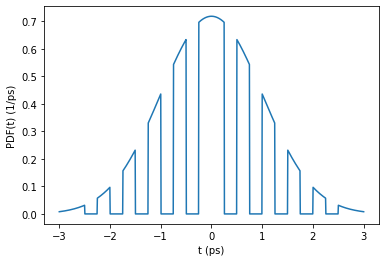

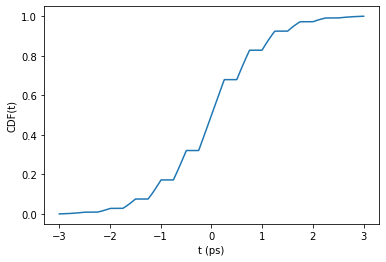

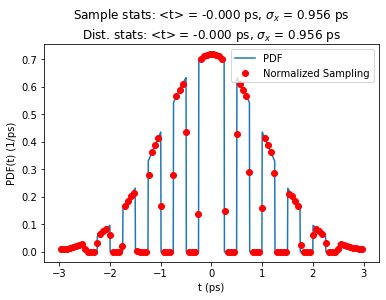

In [7]:
from distgen.dist import File1d
var = 't'
verbose=1
params={'file':'cutgauss.1d.txt','units':'ps'}
file1d = File1d(var,verbose=verbose,**params)
file1d.plot_pdf()
file1d.plot_cdf()
file1d.test_sampling()

crystal temporal laser shaping
      crystal 1 length = 15.096 mm, angle = 0.600 deg
      crystal 2 length = 7.548 mm, angle = 1.800 deg
      crystal 3 length = 3.774 mm, angle = -0.900 deg
      crystal 4 length = 1.887 mm, angle = -0.500 deg
      Pulses propagated: min t = -23.905 ps, max t = 23.905 ps


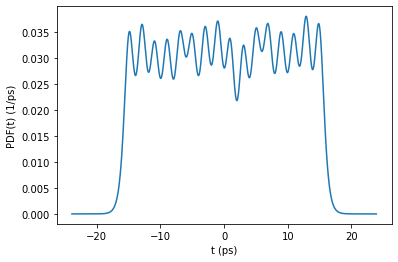

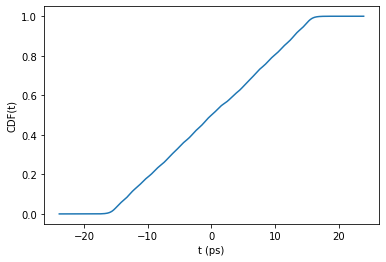

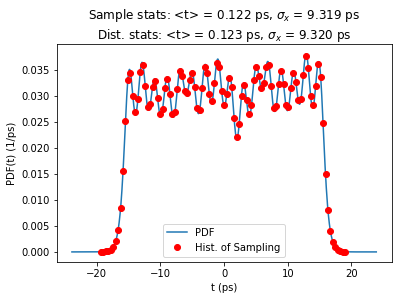

In [6]:
from distgen.dist import TemporalLaserPulseStacking
verbose=1
params={'crystal_length_1': 15.096*unit_registry('mm'),
        'crystal_length_2': 7.548*unit_registry('mm'), 
        'crystal_length_3': 3.774*unit_registry('mm'), 
        'crystal_length_4': 1.887*unit_registry('mm'), 
        'crystal_angle_1':  0.6*unit_registry('deg'), 
        'crystal_angle_2':  1.8*unit_registry('deg'), 
        'crystal_angle_3': -0.9*unit_registry('deg'),  
        'crystal_angle_4': -0.5*unit_registry('deg'), }
    
laser_pulse = TemporalLaserPulseStacking(verbose=verbose,**params)
laser_pulse.plot_pdf()
laser_pulse.plot_cdf()
laser_pulse.test_sampling()

Tukey
      legnth = 2.000 mm, ratio = 0.750


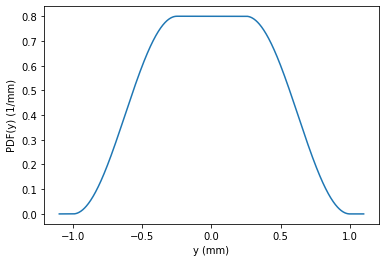

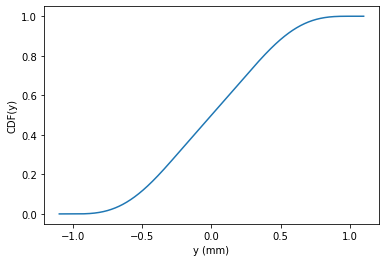

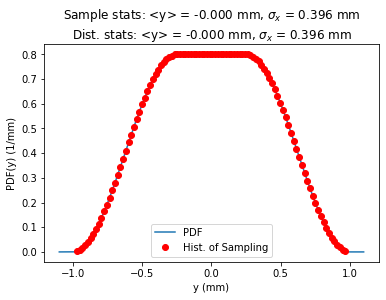

In [7]:
from distgen.dist import Tukey
var = 'y'
verbose=1
params={'length':2*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
tukey = Tukey(var,verbose=1,**params)
tukey.plot_pdf()
tukey.plot_cdf()
tukey.test_sampling()

radial uniform
      min_r = 1.000 mm, max_r = 2.000 mm


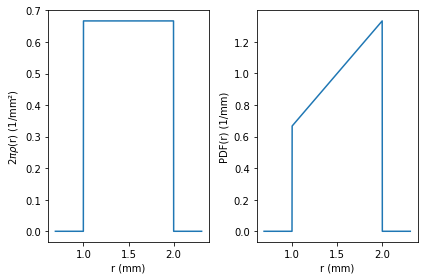

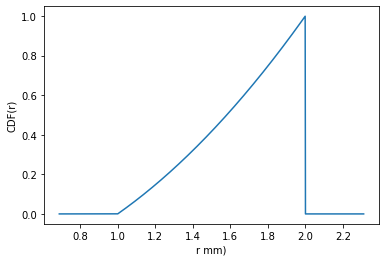

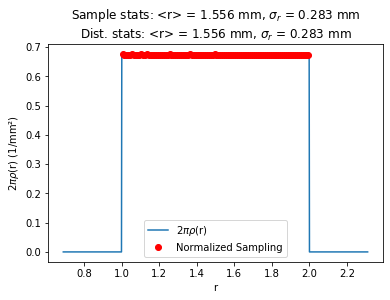

In [39]:
from distgen.dist import UniformRad
verbose=1
params={'min_r':1*unit_registry('mm'),'max_r':2*unit_registry('mm')}
urad = UniformRad(verbose=1,**params)
urad.plot_pdf()
urad.plot_cdf()
urad.test_sampling()

radial Gaussian
      sigma_xy = 1.000 mm


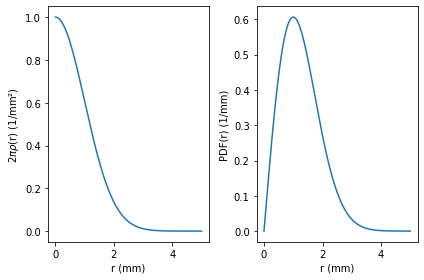

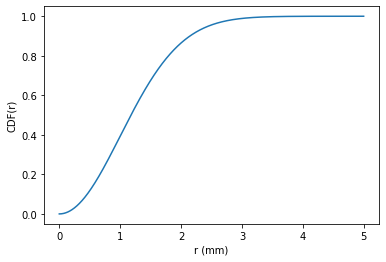

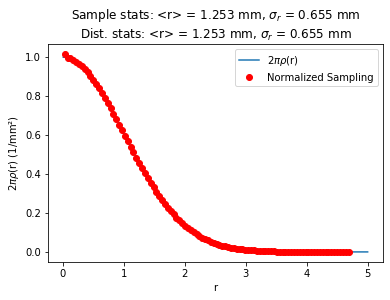

In [41]:
from distgen.dist import NormRad
verbose=1
params={'sigma_xy':1*unit_registry('mm')}
nrad = NormRad(verbose=1,**params)
nrad.plot_pdf()
nrad.plot_cdf()
nrad.test_sampling()

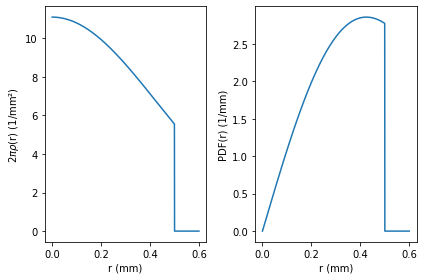

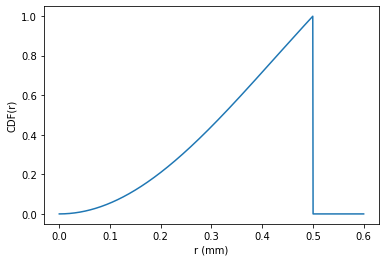

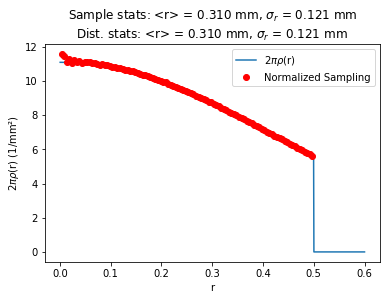

In [49]:
from distgen.dist import NormRadTrunc
verbose=1
params={'pinhole_size':1*unit_registry('mm'),'fraction':0.5*unit_registry('dimensionless')}
nradt = NormRadTrunc(verbose=1,**params)
nradt.plot_pdf()
nradt.plot_cdf()
nradt.test_sampling()


TukeyRad
      legnth = 1.000 mm, ratio = 0.750


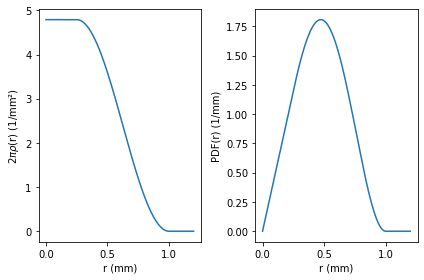

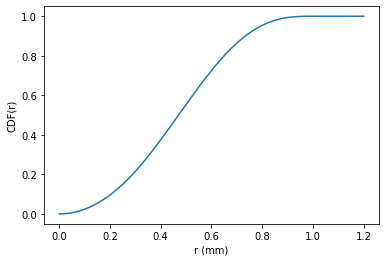

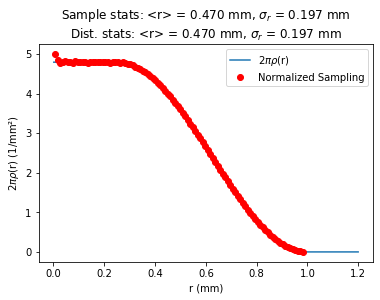

In [78]:
from distgen.dist import TukeyRad
verbose=1
params={'length':1*unit_registry('mm'),'ratio':0.75*unit_registry('dimensionless')}
rtukey = TukeyRad(verbose=1,**params)
rtukey.plot_pdf()
rtukey.plot_cdf()
rtukey.test_sampling()